# Example of the `aitlas` toolbox in the context of multi class image classification

This notebook shows a sample implementation of a multi class image classification using the `aitlas` toolbox and the CLRS dataset.

In [1]:
from aitlas.datasets import CLRSDataset
from aitlas.models import VisionTransformer
from aitlas.transforms import ResizeCenterCropFlipHVToTensor, ResizeCenterCropToTensor, ResizeRandomCropFlipHVToTensor
from aitlas.utils import image_loader

## Load the dataset

In [2]:
dataset_config = {
    "data_dir": "/media/hdd/multi-class/CLRS",
    "csv_file": "/media/hdd/multi-class/CLRS/train.csv",
    "batch_size": 128,
    "shuffle": True,
    "num_workers": 4,
}
dataset = CLRSDataset(dataset_config)

## Show images from the dataset

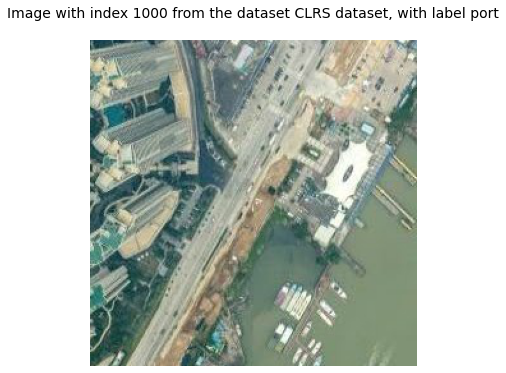

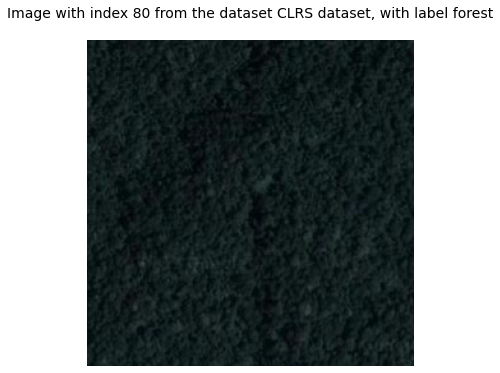

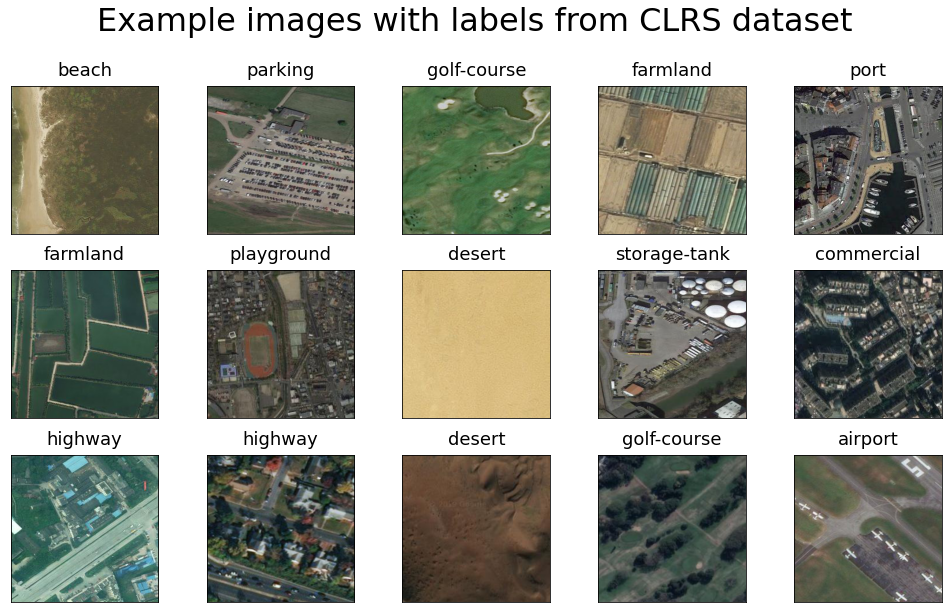

In [3]:
fig1 = dataset.show_image(1000)
fig2 = dataset.show_image(80)
fig3 = dataset.show_batch(15)

## Inspect the data

In [4]:
dataset.show_samples()

,File name,Label
0,residential/residential_543_Level2_0.84m.tif,residential
1,beach/beach_172_Level1_0.48m.tif,beach
2,residential/residential_530_Level3_1.86m.tif,residential
3,highway/highway_62_Level3_0.93m.tif,highway
4,parking/parking_309_Level1_0.46m.tif,parking
5,port/port_275_Level3_2.44m.tif,port
6,port/port_357_Level3_1.15m.tif,port
7,railway/railway_432_Level2_0.73m.tif,railway
8,meadow/meadow_596_Level1_0.39m.tif,meadow
9,storage-tank/storage-tank_469_Level1_0.60m.tif,storage-tank


In [5]:
dataset.data_distribution_table()

,Label,Count
0,airport,360
1,bare-land,360
2,beach,360
3,bridge,360
4,commercial,360
5,desert,360
6,farmland,360
7,forest,360
8,golf-course,360
9,highway,360


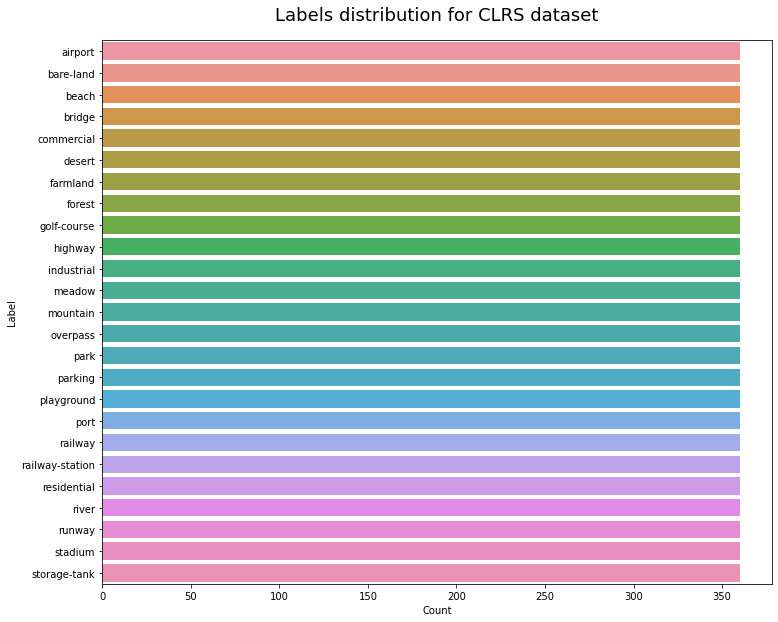

In [6]:
fig = dataset.data_distribution_barchart()

## Load train and validation splits

In [7]:
train_dataset_config = {
    "batch_size": 32,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-class/CLRS",
    "csv_file": "/media/hdd/multi-class/CLRS/train.csv",
}

train_dataset = CLRSDataset(train_dataset_config)
train_dataset.transform = ResizeRandomCropFlipHVToTensor() 

validation_dataset_config = {
    "batch_size": 32,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-class/CLRS",
    "csv_file": "/media/hdd/multi-class/CLRS/val.csv",
    "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
}

validation_dataset = CLRSDataset(validation_dataset_config)
len(train_dataset), len(validation_dataset)

(9000, 3000)

## Setup and create the model for training

In [8]:
epochs = 100
model_directory = "./experiments/CLRS"
model_config = {
    "num_classes": 25, 
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["accuracy", "precision", "recall", "f1_score"]
}
model = VisionTransformer(model_config)
model.prepare()

## Training and validation

In [ ]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=validation_dataset,
    run_id='1',
)

## Test the model

In [ ]:
test_dataset_config = {
    "batch_size": 16,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-class/CLRS",
    "csv_file": "/media/hdd/multi-class/CLRS/test.csv",
    "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
}

test_dataset = CLRSDataset(test_dataset_config)
model_path = "best_checkpoint_1654596678_20.pth.tar"
model.metrics = ["accuracy", "precision", "recall", "f1_score"]
model.running_metrics.reset()
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

## Predictions

2022-10-19 11:55:19,750 INFO Loading checkpoint best_checkpoint_1654596678_20.pth.tar
2022-10-19 11:55:20,083 INFO Loaded checkpoint best_checkpoint_1654596678_20.pth.tar at epoch 21


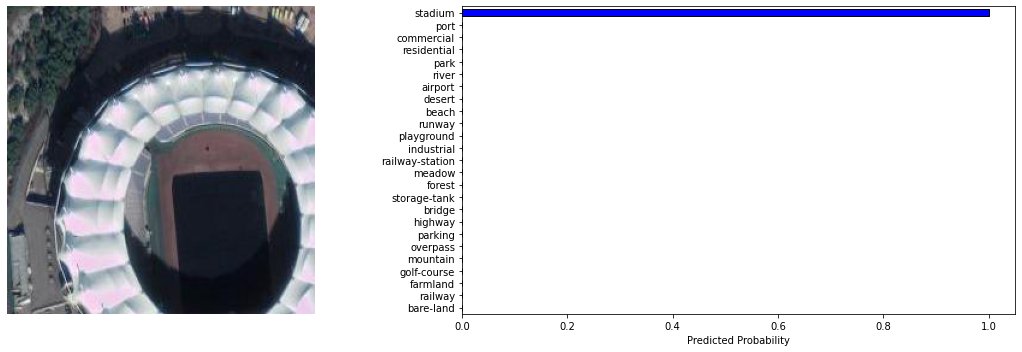

In [24]:
#labels = CLRSDataset.labels
labels = ["airport", "bare-land", "beach", "bridge", "commercial", "desert", "farmland", "forest", "golf-course",
          "highway", "industrial", "meadow", "mountain", "overpass", "park", "parking", "playground", "port", "railway",
          "railway-station", "residential", "river", "runway", "stadium", "storage-tank"]
transform = ResizeCenterCropToTensor()

model_path = "best_checkpoint_1654596678_20.pth.tar"
model.load_model(model_path)

image = image_loader('/media/hdd/multi-class/CLRS/stadium/stadium_353_Level1_0.95m.tif')
fig = model.predict_image(image, labels, transform)